In [1]:
%%bash
pip install seaborn

In [2]:
# imports
import h2o 
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,11 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,2 months and 16 days
H2O cluster name:,H2O_from_python_youdan_iqvgnz
H2O cluster total nodes:,1
H2O cluster free memory:,1.311 Gb
H2O cluster total cores:,1
H2O cluster allowed cores:,1
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [4]:
df = pd.read_csv("/home/youdan/Documents/Practicum/Encoding_Version4.csv", sep=',', encoding='latin-1')
df.head()

,Unnamed: 0,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_revenue,opening_weekend_theaters,maximum_theaters,...,rating.PG,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others
0,1,10100,Titanic,Titanic,1997,194.0,0.0,28638131,2674,3265,...,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,20100,The Dark Knight,Dark Knight The,2008,152.0,1.0,158411483,4366,4366,...,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119.0,0.0,1554475,43,2375,...,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,40100,Shrek 2,Shrek 2,2004,92.0,1.0,108037878,4163,4223,...,1,0,0,NaN,0.0,1.0,0.0,0.0,0.0,0.0
4,5,50100,ET: The Extra-Terrestrial,ET The Extra Terrestrial,1982,114.0,0.0,11911430,1101,3010,...,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:
cols = list(df)
cols.insert(-1, cols.pop(cols.index('domestic_box_office')))
cols
cols.insert(-1, cols.pop(cols.index('Rank.others')))
#cols

In [7]:
df = df.ix[:,cols]
df.head()

,Unnamed: 0,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_revenue,opening_weekend_theaters,maximum_theaters,...,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,domestic_box_office
0,1,10100,Titanic,Titanic,1997,194.0,0.0,28638131,2674,3265,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,658672302
1,2,20100,The Dark Knight,Dark Knight The,2008,152.0,1.0,158411483,4366,4366,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,533345358
2,3,30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119.0,0.0,1554475,43,2375,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,460998007
3,4,40100,Shrek 2,Shrek 2,2004,92.0,1.0,108037878,4163,4223,...,0,0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,441226247
4,5,50100,ET: The Extra-Terrestrial,ET The Extra Terrestrial,1982,114.0,0.0,11911430,1101,3010,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,435110554


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_revenue,opening_weekend_theaters,maximum_theaters,theatrical_engagements,...,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,domestic_box_office
0,10100,Titanic,Titanic,1997,194.0,0.0,28638131,2674,3265,87202,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,658672302
1,20100,The Dark Knight,Dark Knight The,2008,152.0,1.0,158411483,4366,4366,39170,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,533345358
2,30100,Star Wars Ep. IV: A New Hope,Star Wars Ep IV A New Hope,1977,119.0,0.0,1554475,43,2375,43684,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,460998007
3,40100,Shrek 2,Shrek 2,2004,92.0,1.0,108037878,4163,4223,33603,...,0,0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,441226247
4,50100,ET: The Extra-Terrestrial,ET The Extra Terrestrial,1982,114.0,0.0,11911430,1101,3010,62065,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,435110554


In [10]:
df.to_csv('domestic_box_office.csv')

In [11]:
path = '/home/youdan/Documents/Practicum/domestic_box_office.csv'

In [12]:
frame = h2o.import_file(path=path) # multi-threaded import

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [13]:
frame.describe()

Rows:10594
Cols:60




,C1,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_revenue,opening_weekend_theaters,maximum_theaters,theatrical_engagements,production_budget,international_box_office,inflation_adjusted_domestic_box_office,name_length,source_category.fiction_tale_novel,source_category.music_dance,source_category.original_screenplay,source_category.others,source_category.play_TV_movie_film,source_category.real_factual,source_category.NA,production_companies_size.Big_15,production_companies_size.Extra_small,production_companies_size.Large,production_companies_size.Medium,production_companies_size.NULL,production_companies_size.Others,production_companies_size.Small,Rank.others.x,Rank.act_1000,Rank.act_250,Rank.act_500.x,Rank.act_750,genre.Action,genre.Adventure,genre.Comedy,genre.Concert/Performance,genre.Documentary,genre.Drama,genre.Horror,genre.Musical,genre.Others,genre.Thriller/Suspense,genre.Western,rating.G,rating.NC-17,rating.Not Rated,rating.Open,rating.PG,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,domestic_box_office
type,int,int,string,string,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,0.0,10100.0,NaN,NaN,1902.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
mean,5296.5,115875216.10345477,NaN,NaN,2006.8768170662638,97.1203738317756,0.04843601895734597,5091609.640362451,690.8191429110826,770.4321313951297,3971.1731168586007,13874950.005663572,23700190.34523137,25434537.117141757,15.635831602794036,0.1363979611100623,0.003209363790824995,0.46913347177647724,0.033226354540305834,0.03162167264489334,0.18302812912969604,0.14338304700774024,0.15747103868054194,0.22364029059493418,0.34223443942666404,0.36756332220695076,0.029255841350873748,0.354408010995484,0.30335754957785194,0.9393130450258053,0.29115500978821857,0.29186688022779855,0.25093432995194875,0.2407901761879338,0.06248820086841608,0.04578063054559185,0.218331130828771,0.0047196526335661695,0.13045119879176892,0.30536152539173117,0.03804040022654333,0.009533698319803663,0.1129884840475741,0.0686237492920521,0.0036813290541816124,0.016518784217481593,0.001699074948083821,0.34642250330375685,0.0002831791580139702,0.08778553898433075,0.20237870492731735,0.34491221446101566,0.6189910979228487,0.05594207014056511,0.024563396279994317,0.04671304841686781,0.09456197643049835,0.05849779923328127,0.7197217094987931,18817316.41891638
maxs,10593.0,284460100.0,NaN,NaN,2017.0,600.0,1.0,247966675.0,4468.0,4468.0,87202.0,425000000.0,2023411357.0,3926220158.0,86.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,936662225.0
sigma,3058.36871005879,73795347.49056596,NaN,NaN,7.246012430689698,35.68271325565838,0.21469592487208042,14355630.602723205,1194.5515895877886,1211.0350312240892,7296.221585490208,32428855.81257,79907153.02579232,81581240.00872976,8.748804928832836,0.3432268597563215,0.056562936387576646,0.4990699029049416,0.17923558887256325,0.17499895204443025,0.38670783401998826,0.3504795909867218,0.36428006536298047,0.41672461972231983,0.4745042006820493,0.48218894479410784,0.16853935582423948,0.47838050394022985,0.4597534658832248,0.23877645434631053,0.4543352355118052,0.4546618451710317,0.4335893793321747,0.4276012246670089,0.24205155651442375,0.2090188707748133,0.4131328588104461,0.0685406518370333,0.3368150707554786,0.4605821190148933,0.19130285585735743,0.09717869280693708,0.31659366336356903,0.2528251648517537,0.06056503212180223,0.1274654762343041,0.041186748061616936,0.4758522107022408,0.01682633925358864

In [14]:
# split into 40% training, 30% validation, and 30% test
train, valid, test = frame.split_frame([0.4, 0.3])

In [15]:
y = 'domestic_box_office'
X = [name for name in frame.columns if name not in ['Unnamed: 0 ', 'C1','odid', 'odname', 'opening_weekend_revenue', 'international_box_office','inflation_adjusted_domestic_box_office',y]]
print(y)
print(X)

domestic_box_office
['display_name', 'od_name', 'production_year', 'running_time', 'sequel', 'opening_weekend_theaters', 'maximum_theaters', 'theatrical_engagements', 'production_budget', 'name_length', 'source_category.fiction_tale_novel', 'source_category.music_dance', 'source_category.original_screenplay', 'source_category.others', 'source_category.play_TV_movie_film', 'source_category.real_factual', 'source_category.NA', 'production_companies_size.Big_15', 'production_companies_size.Extra_small', 'production_companies_size.Large', 'production_companies_size.Medium', 'production_companies_size.NULL', 'production_companies_size.Others', 'production_companies_size.Small', 'Rank.others.x', 'Rank.act_1000', 'Rank.act_250', 'Rank.act_500.x', 'Rank.act_750', 'genre.Action', 'genre.Adventure', 'genre.Comedy', 'genre.Concert/Performance', 'genre.Documentary', 'genre.Drama', 'genre.Horror', 'genre.Musical', 'genre.Others', 'genre.Thriller/Suspense', 'genre.Western', 'rating.G', 'rating.NC-17

In [29]:
# random forest

# initialize rf model
rf_model = H2ORandomForestEstimator(
    ntrees=500,                      # Up to 300 decision trees in the forest 
    max_depth=30,                    # trees can grow to depth of 30
    stopping_rounds=5,               # stop after validation error does not decrease for 5 iterations/new trees
    score_each_iteration=True,       # score validation error on every iteration/new tree
    model_id='rf_model')             # for easy lookup in flow

# train rf model
rf_model.train(
    x=X,
    y=y,
    training_frame=train,
    validation_frame=valid)

# print model information
rf_model

# view detailed results at http://localhost:54321/flow/index.html

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 288035176260996.7
RMSE: 16971599.10736159
MAE: 4747551.010935199
RMSLE: 1.8655464650079674
Mean Residual Deviance: 288035176260996.7

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 336613407344329.94
RMSE: 18347027.207270663
MAE: 5398210.542513196
RMSLE: 1.9719550323938664
Mean Residual Deviance: 336613407344329.94
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-08-07 09:31:04,0.001 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-08-07 09:31:04,0.410 sec,1.0,22463015.2409828,6786714.4692908,504587053716627.7500000,28049170.2121098,8333403.9770889,786755949587909.5000000
,2017-08-07 09:31:05,0.626 sec,2.0,23659971.8503146,6673495.3766307,559794267957680.8750000,22224888.9151519,6800730.2066603,493945687290841.6250000
,2017-08-07 09:31:05,0.827 sec,3.0,23219671.2978286,6356281.2626502,539153135179204.2500000,20201868.8090813,6170804.9708231,408115503379330.3750000
,2017-08-07 09:31:05,1.020 sec,4.0,21947167.9191923,6141892.4075118,481678179673225.0625000,20412524.3338852,6030843.4003592,416671149681455.5000000
---,---,---,---,---,---,---,---,---,---
,2017-08-07 09:31:09,4.961 sec,24.0,17008419.9243843,4695178.0311714,289286348324193.3750000,18330877.5274226,5309372.2724620,336021070925367.1250000
,2017-08-07 09:31:09,5.066 sec,25.0,17118054.5195653,4822480.9083647,293027790534808.5625000,18303492.2156366,5399487.6429319,335017827287869.5000000
,2017-08-07 09:31:09,5.253 sec,26.0,17086074.7245484,4798680.4776043,291933949492853.0000000,18248421.0989135,5397243.4164101,333004872603272.5000000
,2017-08-07 09:31:09,5.410 sec,27.0,16929337.2356179,4759049.7820345,286602459237278.2500000,18314768.5801772,5391708.8261182,335430748145446.9375000



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
theatrical_engagements,90448931521690599424.0000000,1.0,0.4576533
maximum_theaters,35836140591545057280.0000000,0.3962030,0.1813236
opening_weekend_theaters,28892586123674517504.0000000,0.3194354,0.1461906
production_budget,11402226950618480640.0000000,0.1260626,0.0576930
Rank.others.y,7632578272823345152.0000000,0.0843855,0.0386193
---,---,---,---
production_companies_size.NULL,9497692036136960.0000000,0.0001050,0.0000481
genre.Concert/Performance,3892696364089344.0000000,0.0000430,0.0000197
source_category.NA,864125676683264.0000000,0.0000096,0.0000044
genre.Others,172738618589184.0000000,0.0000019,0.0000009



See the whole table with table.as_data_frame()


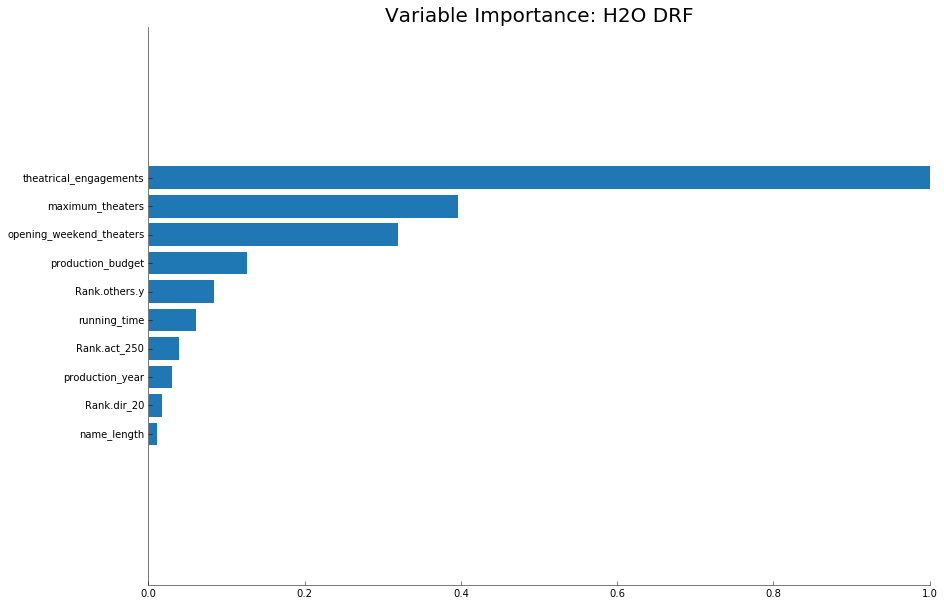

In [30]:
rf_model.varimp_plot(num_of_features=10)

In [18]:
test.head()

C1,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_revenue,opening_weekend_theaters,maximum_theaters,theatrical_engagements,production_budget,international_box_office,inflation_adjusted_domestic_box_office,name_length,source_category.fiction_tale_novel,source_category.music_dance,source_category.original_screenplay,source_category.others,source_category.play_TV_movie_film,source_category.real_factual,source_category.NA,production_companies_size.Big_15,production_companies_size.Extra_small,production_companies_size.Large,production_companies_size.Medium,production_companies_size.NULL,production_companies_size.Others,production_companies_size.Small,Rank.others.x,Rank.act_1000,Rank.act_250,Rank.act_500.x,Rank.act_750,genre.Action,genre.Adventure,genre.Comedy,genre.Concert/Performance,genre.Documentary,genre.Drama,genre.Horror,genre.Musical,genre.Others,genre.Thriller/Suspense,genre.Western,rating.G,rating.NC-17,rating.Not Rated,rating.Open,rating.PG,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,domestic_box_office
0,10100,Titanic,Titanic,1997,194,0,2.86381e+07,2674,3265,87202,2e+08,1.54894e+09,1.14735e+09,7,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,6.58672e+08
8,90100,Transformers: Revenge of the Fallen,Transformers Revenge of the Fallen,2009,149,1,1.08966e+08,4234,4293,28686,2.1e+08,4.34408e+08,4.51974e+08,35,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,4.02112e+08
11,120100,Spider-Man 2,Spider Man 2,2004,127,1,8.81562e+07,4152,4166,29417,2e+08,4.10181e+08,5.07055e+08,12,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3.73524e+08
12,130100,The Passion of the Christ,Passion of the Christ The,2004,127,0,8.38481e+07,3043,3408,35829,2.5e+07,2.51638e+08,5.03312e+08,25,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3.70783e+08
13,140100,Jurassic Park,Jurassic Park,1993,126,0,5.01595e+07,2404,2778,49159,6.3e+07,6.43104e+08,7.60803e+08,13,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3.95708e+08
15,160100,Finding Nemo,Finding Nemo,2003,100,0,7.02517e+07,3374,3425,50008,9.4e+07,5.559e+08,5.18149e+08,12,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3.80529e+08
20,200100,Shrek the Third,Shrek the Third,2007,92,1,1.21629e+08,4122,4172,28052,1.6e+08,4.84611e+08,3.95426e+08,15,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,3.2272e+08
25,250100,The Lord of the Rings: The Fellowship of the Ring,Lord of the Rings The Fellowship of the Ring The,2001,179,0,4.72115e+07,3359,3381,39234,1.09e+08,5.71666e+08,4.65454e+08,49,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,nan,0,0,0,0,0,1,3.15545e+08
29,300100,Pirates of the Caribbean: The Curse of the Black Pearl,Pirates of the Caribbean The Curse of the Black Pearl,2003,144,0,4.66307e+07,3269,3416,36876,1.25e+08,3.29543e+08,4.26968e+08,54,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3.05411e+08
30,310100,Harry Potter and the Half-Blood Prince,Harry Potter and the Half Blood Prince,2009,153,1,7.78357e+07,4325,4455,27206,2.5e+08,6.33124e+08,3.39402e+08,38,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3.01959e+08


In [19]:
rf_predictions = rf_model.predict(test[:-1])

drf prediction progress: |████████████████████████████████████████████████| 100%


In [20]:
rf_predictions.head()

predict
3.00675e+08
3.05877e+08
3.09987e+08
1.85032e+08
2.22491e+08
2.46127e+08
3.0118e+08
2.36807e+08
2.10803e+08
3.37643e+08


In [21]:
print(rf_model.model_performance(test_data=test).r2())
print(rf_model.model_performance(test_data=test).mse())

0.8967367893328468
273556767550401.6


In [22]:
test=test.cbind(rf_predictions)
test.head()

C1,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_revenue,opening_weekend_theaters,maximum_theaters,theatrical_engagements,production_budget,international_box_office,inflation_adjusted_domestic_box_office,name_length,source_category.fiction_tale_novel,source_category.music_dance,source_category.original_screenplay,source_category.others,source_category.play_TV_movie_film,source_category.real_factual,source_category.NA,production_companies_size.Big_15,production_companies_size.Extra_small,production_companies_size.Large,production_companies_size.Medium,production_companies_size.NULL,production_companies_size.Others,production_companies_size.Small,Rank.others.x,Rank.act_1000,Rank.act_250,Rank.act_500.x,Rank.act_750,genre.Action,genre.Adventure,genre.Comedy,genre.Concert/Performance,genre.Documentary,genre.Drama,genre.Horror,genre.Musical,genre.Others,genre.Thriller/Suspense,genre.Western,rating.G,rating.NC-17,rating.Not Rated,rating.Open,rating.PG,rating.PG-13,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,domestic_box_office,predict
0,10100,Titanic,Titanic,1997,194,0,2.86381e+07,2674,3265,87202,2e+08,1.54894e+09,1.14735e+09,7,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,6.58672e+08,3.00675e+08
8,90100,Transformers: Revenge of the Fallen,Transformers Revenge of the Fallen,2009,149,1,1.08966e+08,4234,4293,28686,2.1e+08,4.34408e+08,4.51974e+08,35,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,4.02112e+08,3.05877e+08
11,120100,Spider-Man 2,Spider Man 2,2004,127,1,8.81562e+07,4152,4166,29417,2e+08,4.10181e+08,5.07055e+08,12,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3.73524e+08,3.09987e+08
12,130100,The Passion of the Christ,Passion of the Christ The,2004,127,0,8.38481e+07,3043,3408,35829,2.5e+07,2.51638e+08,5.03312e+08,25,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3.70783e+08,1.85032e+08
13,140100,Jurassic Park,Jurassic Park,1993,126,0,5.01595e+07,2404,2778,49159,6.3e+07,6.43104e+08,7.60803e+08,13,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3.95708e+08,2.22491e+08
15,160100,Finding Nemo,Finding Nemo,2003,100,0,7.02517e+07,3374,3425,50008,9.4e+07,5.559e+08,5.18149e+08,12,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3.80529e+08,2.46127e+08
20,200100,Shrek the Third,Shrek the Third,2007,92,1,1.21629e+08,4122,4172,28052,1.6e+08,4.84611e+08,3.95426e+08,15,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,3.2272e+08,3.0118e+08
25,250100,The Lord of the Rings: The Fellowship of the Ring,Lord of the Rings The Fellowship of the Ring The,2001,179,0,4.72115e+07,3359,3381,39234,1.09e+08,5.71666e+08,4.65454e+08,49,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,nan,0,0,0,0,0,1,3.15545e+08,2.36807e+08
29,300100,Pirates of the Caribbean: The Curse of the Black Pearl,Pirates of the Caribbean The Curse of the Black Pearl,2003,144,0,4.66307e+07,3269,3416,36876,1.25e+08,3.29543e+08,4.26968e+08,54,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3.05411e+08,2.10803e+08
30,310100,Harry Potter and the Half-Blood Prince,Harry Potter and the Half Blood Prince,2009,153,1,7.78357e+07,4325,4455,27206,2.5e+08,6.33124e+08,3.39402e+08,38,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3.01959e+08,3.37643e+08


In [23]:
test_df=test.as_data_frame()
result = test_df.sort_values(['predict'],ascending=False)
result1 = result.reset_index(drop= True)
result1.head()

,C1,odid,display_name,od_name,production_year,running_time,sequel,opening_weekend_revenue,opening_weekend_theaters,maximum_theaters,...,rating.R,Rank.others.y,Rank.dir_100,Rank.dir_20,Rank.dir_200,Rank.dir_500,Rank.dir_900,Rank.others,domestic_box_office,predict
0,6032,117960100,The Avengers,Avengers The (2011),2012,143.0,0.0,207438708,4349,4349,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,623279547,4.927040e+08
1,7989,179490100,Avengers: Age of Ultron,Avengers Age of Ultron,2015,141.0,1.0,191271109,4276,4276,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,459005868,3.999042e+08
2,8507,193830100,Inside Out,Inside Out (2015),2015,95.0,0.0,90440272,3946,4158,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,356461711,3.414372e+08
3,30,310100,Harry Potter and the Half-Blood Prince,Harry Potter and the Half Blood Prince,2009,153.0,1.0,77835727,4325,4455,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,301959197,3.376430e+08
4,7527,165370100,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,0.0,94320883,4080,4088,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,333172112,3.308433e+08


In [24]:
newdf = result1[result1.columns[59:61]]
newdf.head()

,domestic_box_office,predict
0,623279547,4.927040e+08
1,459005868,3.999042e+08
2,356461711,3.414372e+08
3,301959197,3.376430e+08
4,333172112,3.308433e+08


In [25]:
%matplotlib inline

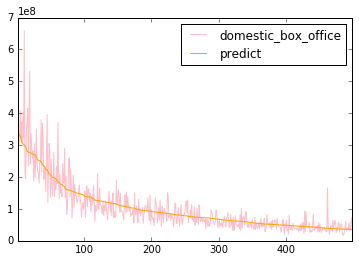

In [31]:
newdf[1:500].plot(color=['pink','orange'])

In [32]:
h2o.cluster().shutdown(prompt=False)

H2O session _sid_a765 closed.
